
**Allan Reuben 260783324**
# **ECSE 415 Assigment 1**




# Part 2: Invariance of SIFT Features

2.1: Invariance under scale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive

# From tutorial 4
# We need to install opencv-contrib-python
# Run following command on your terminal
!pip install opencv-contrib-python==3.4.2.16

drive.mount('/content/drive')
# Change this path to run with files in a different location
path = '/content/drive/My Drive/ECSE415/Assignment-2/images/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


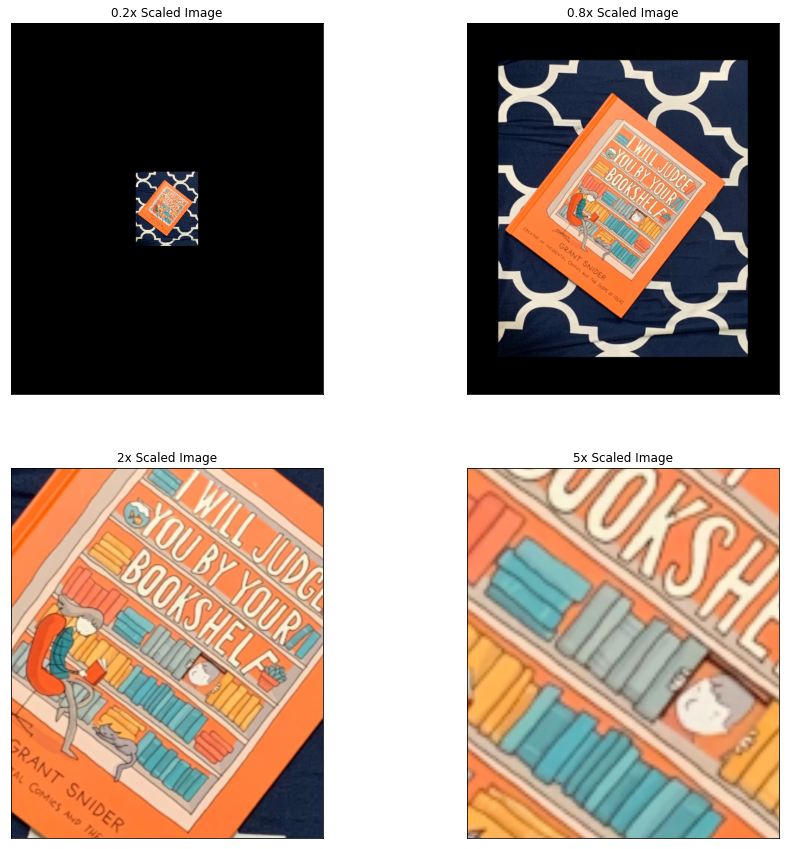

In [2]:
# Load image and copy
book = cv2.imread(path+"book.jpg")
book_disp = book.copy()

# Convert to RGB
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
book_disp = cv2.cvtColor(book_disp, cv2.COLOR_BGR2RGB)

# 2.1.1: Compute SIFT keypoints for reference image
# From tutorial 4
# Ref: https://docs.opencv.org/master/d7/d60/classcv_1_1SIFT.html
sift = cv2.xfeatures2d.SIFT_create()
referenceKeypoints, referenceDescriptors = sift.detectAndCompute(book, None)

# 2.1.2: Scale reference image. Display scaled images

# Create scaled images
height, width = book.shape[0:2]
scales = [0.2, 0.8, 2, 5]
scaledImage = np.empty(4, dtype=object)

# From tutorial 4
# Ref for getRotationMatrix2D: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326
# Ref for warpAffine: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983
for i in range(len(scales)):
  M = cv2.getRotationMatrix2D((width/2,height/2),0,scales[i])
  scaledImage[i] = cv2.warpAffine(book,M,(width,height))

# Plot scaled images
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(scaledImage[0])
plt.title("0.2x Scaled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(scaledImage[1])
plt.title("0.8x Scaled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(scaledImage[2])
plt.title("2x Scaled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(scaledImage[3])
plt.title("5x Scaled Image"), plt.xticks([]), plt.yticks([])
plt.show()

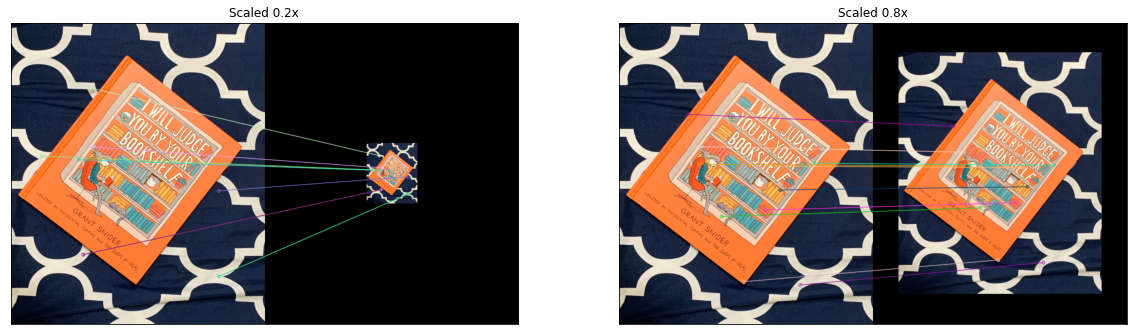

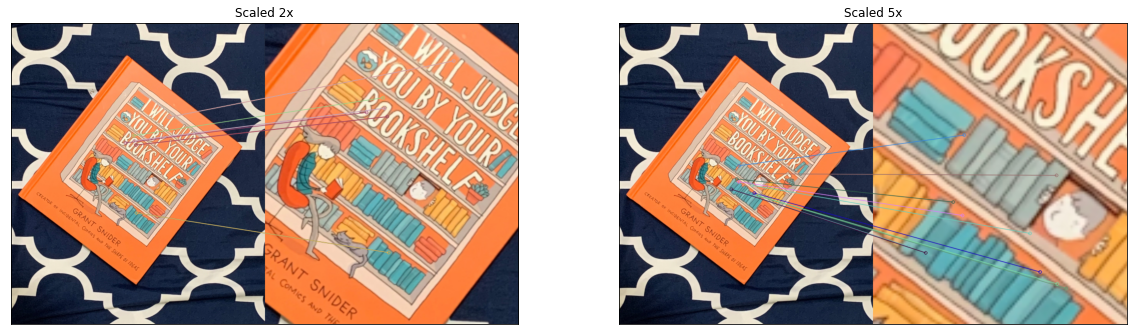

In [3]:
# 2.1.3: Compute SIFT keypoints for all (total 4) transformed images.

scaledKeypoints = np.empty(4, dtype=object)
scaledDescriptors = np.empty(4, dtype=object)

for i in range(len(scales)):
  scaledKeypoints[i], scaledDescriptors[i] = sift.detectAndCompute(scaledImage[i], None)

# 2.1.4: Match all keypoints of the reference image to the transformed images using a brute-force method.
# 2.1.5: Sort matching keypoints according to the matching distance.

scaledMatches = np.empty(4, dtype=object)

# From tutorial 4 (bf matcher, using bf.match and using sorted with lambda function)
# Ref for brute force matcher: https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html#ac6418c6f87e0e12a88979ea57980c020
bf = cv2.BFMatcher()

for i in range(len(scales)):
  scaledMatches[i] = sorted(bf.match(referenceDescriptors, scaledDescriptors[i]), key = lambda x:x.distance)

# 2.1.6: Display top ten matched keypoints for each pair of the reference image and a transformed image.

scaledDisplay = np.empty(4, dtype=object)

# Drawmatches from tutorial 4
for i in range(len(scales)):
  scaledDisplay[i] = cv2.drawMatches(book, referenceKeypoints, scaledImage[i], scaledKeypoints[i], scaledMatches[i][:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(scaledDisplay[0])
plt.title("Scaled 0.2x"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(scaledDisplay[1])
plt.title("Scaled 0.8x"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(scaledDisplay[2])
plt.title("Scaled 2x"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(scaledDisplay[3])
plt.title("Scaled 5x"), plt.xticks([]), plt.yticks([])
plt.show()

<function matplotlib.pyplot.show>

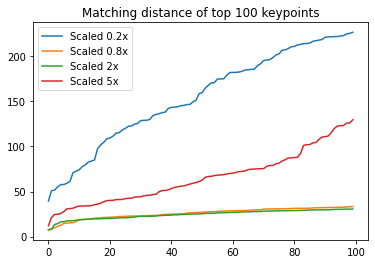

In [4]:
# 2.1.7: Plot the matching distance for the top 100 matched keypoints.
#        Plot indices of keypoints on the x-axis and corresponding matching distance on the y- axis.

tempScaled0 = []
tempScaled1 = []
tempScaled2 = []
tempScaled3 = []

for i in range(100):
  tempScaled0.append(scaledMatches[0][i].distance)
for i in range(100):
  tempScaled1.append(scaledMatches[1][i].distance)
for i in range(100):
  tempScaled2.append(scaledMatches[2][i].distance)
for i in range(100):
  tempScaled3.append(scaledMatches[3][i].distance)

plt.plot(tempScaled0, label="Scaled 0.2x")
plt.plot(tempScaled1, label="Scaled 0.8x")
plt.plot(tempScaled2, label="Scaled 2x")
plt.plot(tempScaled3, label="Scaled 5x")
plt.title("Matching distance of top 100 keypoints")
plt.legend()
plt.show


2.1.8. Discuss the trend in the plotted results. What is the effect of increasing the scale on the matching distance? Reason the cause.

In the plotted results above, we see that the matching distance increases with worse matches (normal since they are sorted). Matching distance is quite low and does not increase as much with the 0.8x scaled and 2x scaled images, while matching distance is relatively high with the 0.2x and 5x scaled images.

I believe that this is the case because the more an image is scaled, the more information is lost in the image. Thus the 128 dimensional SIFT descriptor will be different from the original and have a higher euclidean matching distance.

**2.2: Invariance under rotation**

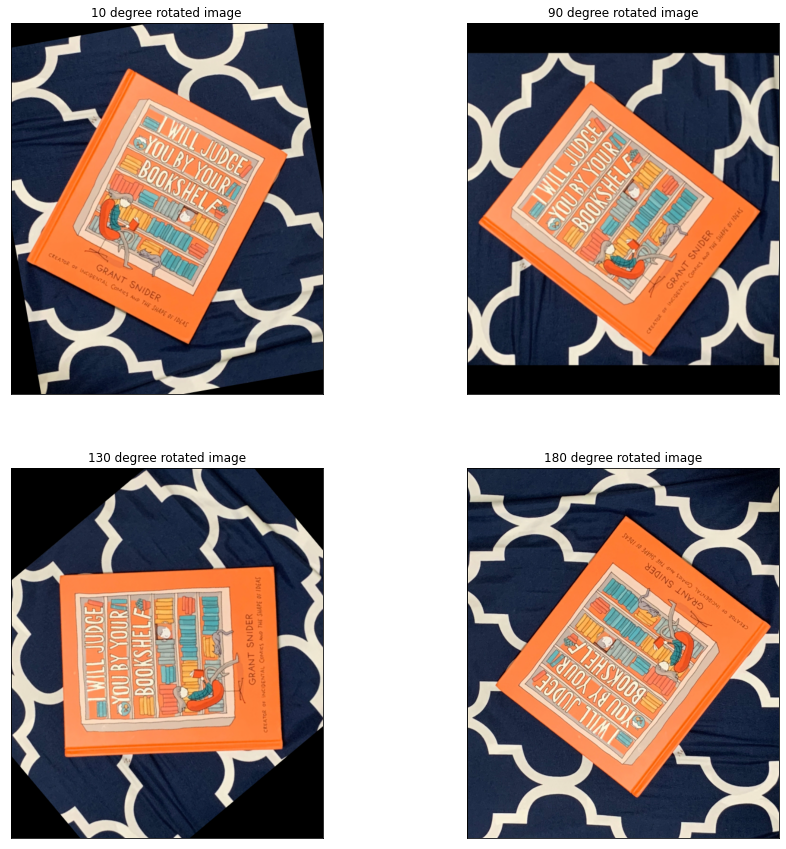

In [5]:
# Create rotated images
height, width = book.shape[0:2]
rotation = [10, 90, 130, 180]
rotatedImage = np.empty(4, dtype=object)

# 2.2.1: Compute SIFT keypoints for reference image
# From tutorial 4
referenceKeypoints, referenceDescriptors = sift.detectAndCompute(book, None)

# 2.2.2: Rotate reference image. Display rotated images
# From tutorial 4
# Ref for getRotationMatrix2D: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326
# Ref for warpAffine: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983
for i in range(len(rotation)):
  M = cv2.getRotationMatrix2D((width/2,height/2),rotation[i],1)
  rotatedImage[i] = cv2.warpAffine(book,M,(width,height))

# Plot rotated images
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(rotatedImage[0])
plt.title("10 degree rotated image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(rotatedImage[1])
plt.title("90 degree rotated image"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(rotatedImage[2])
plt.title("130 degree rotated image"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(rotatedImage[3])
plt.title("180 degree rotated image"), plt.xticks([]), plt.yticks([])
plt.show()

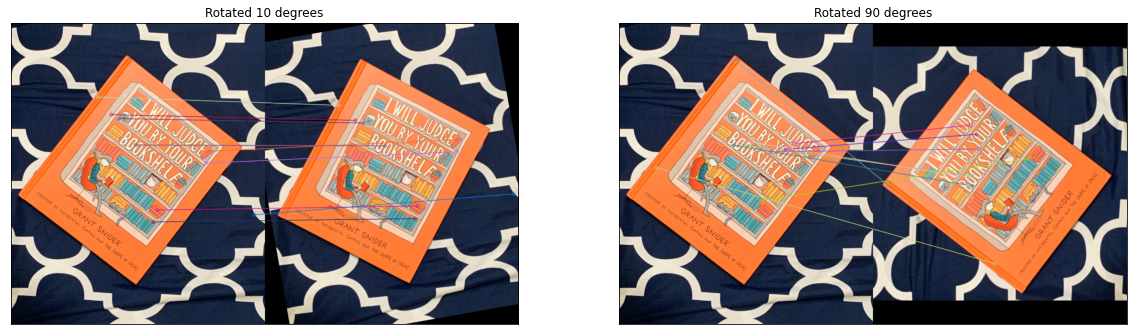

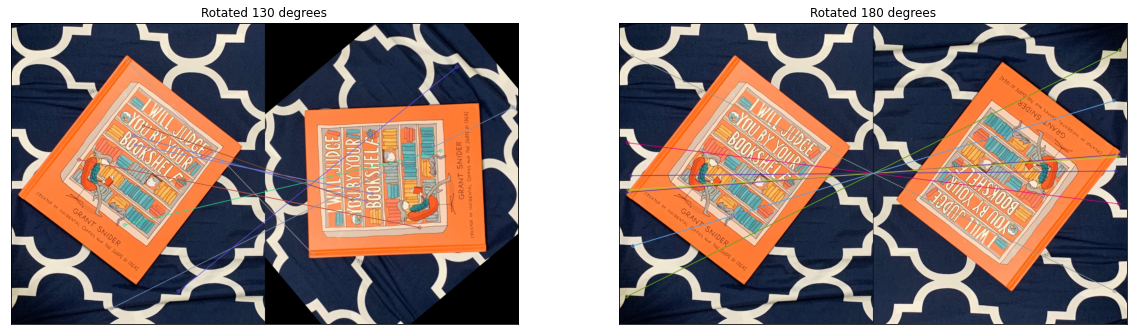

In [6]:
# 2.2.3: Compute SIFT keypoints for all (total 4) transformed images.

rotatedKeypoints = np.empty(4, dtype=object)
rotatedDescriptors = np.empty(4, dtype=object)

# From tutorial 4
for i in range(len(rotation)):
  rotatedKeypoints[i], rotatedDescriptors[i] = sift.detectAndCompute(rotatedImage[i], None)

# 2.2.4: Match all keypoints of the reference image to the transformed images using a brute-force method.
# 2.2.5: Sort matching keypoints according to the matching distance.

rotatedMatches = np.empty(4, dtype=object)

# From tutorial 4 (bf matcher, using bf.match and using sorted with lambda function)
# Ref for brute force matcher: https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html#ac6418c6f87e0e12a88979ea57980c020
for i in range(len(rotation)):
  rotatedMatches[i] = sorted(bf.match(referenceDescriptors, rotatedDescriptors[i]), key = lambda x:x.distance)

# 2.2.6: Display top ten matched keypoints for each pair of the reference image and a transformed image.

rotatedDisplay = np.empty(4, dtype=object)

# Drawmatches from tutorial 4
for i in range(len(rotation)):
  rotatedDisplay[i] = cv2.drawMatches(book, referenceKeypoints, rotatedImage[i], rotatedKeypoints[i], rotatedMatches[i][:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(rotatedDisplay[0])
plt.title("Rotated 10 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rotatedDisplay[1])
plt.title("Rotated 90 degrees"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(rotatedDisplay[2])
plt.title("Rotated 130 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rotatedDisplay[3])
plt.title("Rotated 180 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

<function matplotlib.pyplot.show>

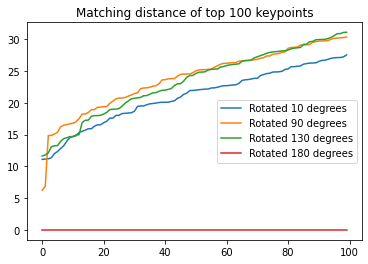

In [7]:
# 2.2.7: Plot the matching distance for the top 100 matched keypoints.
#        Plot indices of keypoints on the x-axis and corresponding matching distance on the y- axis.

tempRotated0 = []
tempRotated1 = []
tempRotated2 = []
tempRotated3 = []

for i in range(100):
  tempRotated0.append(rotatedMatches[0][i].distance)
for i in range(100):
  tempRotated1.append(rotatedMatches[1][i].distance)
for i in range(100):
  tempRotated2.append(rotatedMatches[2][i].distance)
for i in range(100):
  tempRotated3.append(rotatedMatches[3][i].distance)

plt.plot(tempRotated0, label="Rotated 10 degrees")
plt.plot(tempRotated1, label="Rotated 90 degrees")
plt.plot(tempRotated2, label="Rotated 130 degrees")
plt.plot(tempRotated3, label="Rotated 180 degrees")
plt.title("Matching distance of top 100 keypoints")
plt.legend()
plt.show

2.2.8: Discuss the trend in the plotted results. What is the effect of increasing the angle of rotation on the matching distance? Reason the cause.

In the plotted results above, we see that the matching distance increases with worse matches (normal since they are sorted). The matching distance vs index is fairly similar for 10 degree, 90 degree, and 130 degree rotations, and is flat at 0 for the 180 degree rotation.

I believe that this is the case as an image is rotated, some information will be lost in the image depending on the angle of rotation. Thus the 128 dimensional SIFT descriptor will be different from the original and have a higher euclidean matching distance. For example, the 10 degree rotated image is only slightly rotated (thus has more information in common with the original) and has a lower distance as the index increases compared to 90 or 130 degree rotated images. This distance should increase until 90 degrees when the most information is lost (due to cropping as the rotated image retains the original image shape). This theory holds for this data as on average the 130 degree rotation has better match distance. In the case of the 180 degree rotated image, there is no increase as the index rises, meaning the descriptors are all identical to those in the reference image. This is the case as no information is lost (the rotation is a simple flip along an axis) and SIFT descriptors normalize for orientation making these perfectly rotation invariant.

# Part 4: Template Matching

4.1: Given a reference image (scene of Montreal Snow Festival) and a tem- plate face image, iterate over all pixel locations of the reference image and compare the local patch with the template image using the sum of square distance (SSD) metric. Implement this in NumPy (you are prohibited from using OpenCV function for this).

In [8]:
# 4.1: Implement Sum of Square Distance in NumPy

# Create NumPy SSD function, assumed reference is larger than template
def ssd(reference, template):
  # Get image dimensions
  refSize = np.shape(reference)
  templateSize = np.shape(template)
  outputHeight = refSize[0] - templateSize[0] + 1
  outputWidth = refSize[1] - templateSize[1] + 1
  # Create output image
  outputImage = np.zeros((outputHeight, outputWidth))
  # Loop over every pixel in the image
  for i in range(outputHeight):
    for j in range(outputWidth):
      # Define the relevant section of the reference image the size of the template
      # Performs SSD by summing the square of the difference of each pixel in the relevant section to the template
      # Sums (ref_pixel - template_pixel)**2 for each pixel
      outputImage[i,j] = np.sum((reference[i:i+templateSize[1], j:j+templateSize[0]][:,:] - template[:,:])**2)
  return outputImage

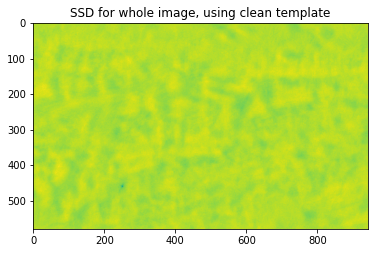

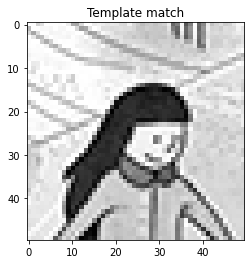

In [9]:
# Load reference image
findMeImg = cv2.imread(path+"find_me_image.jpg")
findMeImg = cv2.cvtColor(findMeImg, cv2.COLOR_BGR2GRAY)

# Load template image
template = cv2.imread(path+"template.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Load noisy template image
templateNoisy = cv2.imread(path+"template_noisy.jpg")
templateNoisy = cv2.cvtColor(templateNoisy, cv2.COLOR_BGR2GRAY)

# 4.2: Display SSD for the whole image. Find the location ((x, y) coordinate) where the SSD is minimum and see if you can find the person there!

cleanSSD = ssd(findMeImg, template)

plt.title("SSD for whole image, using clean template")
plt.imshow(cleanSSD)
plt.show()

# Finding minimum value of SSD, minimum value represents a template match
cleanMin = np.where(cleanSSD == np.amin(cleanSSD))

# Assuming there can be >1 match, for every template match display the match
# For loop using zip adapted from tutorial code
for pt in zip(*cleanMin[::-1]):
    cleanDisplay = np.array(findMeImg[pt[1]:pt[1]+50, pt[0]:pt[0]+50])
    plt.title("Template match")
    plt.imshow(cleanDisplay, cmap='gray')
    plt.show()

As we can see above, using SSD we get a very good match for our template and have found the person!

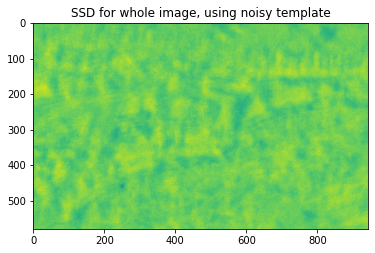

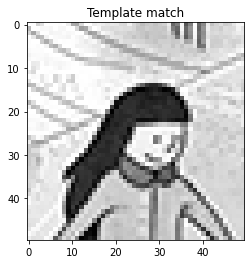

In [10]:
#4.3: Repeat the above process with the noisy template as shown in Figure:4(c).

noisySSD = ssd(findMeImg, templateNoisy)

plt.title("SSD for whole image, using noisy template")
plt.imshow(noisySSD)
plt.show()

# Finding minimum value of SSD, minimum value represents a template match
noisyMin = np.where(noisySSD == np.amin(noisySSD))

# Assuming there can be >1 match, for every template match display the match
# For loop using zip adapted from tutorial 4 code
for pt in zip(*noisyMin[::-1]):
    noisyDisplay = np.array(findMeImg[pt[1]:pt[1]+50, pt[0]:pt[0]+50])
    plt.title("Template match")
    plt.imshow(noisyDisplay, cmap='gray')
    plt.show()

As shown above, we have a good match using the noisy template and have found the person!